###### 1. Data Input

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from patsy import dmatrices
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

if __name__ == '__main__':
    path_rein9 = r'C:\Users\rein9'
    path_rein = r'C:\Users\Rein'
    usr_path = path_rein9 if os.path.exists(path_rein9) == True else path_rein
    train_path = os.path.join(usr_path, r'.kaggle\competitions\titanic', 'train.csv')
    test_path = os.path.join(usr_path, r'.kaggle\competitions\titanic', 'test.csv')  
    traindata = pd.read_csv('creditcard_train.csv')
    testdata = pd.read_csv('creditcard_test.csv')

In [ ]:
plt.scatter(traindata.Class, traindata.Time)
# probably not going to use the Time feature
# traindata.Time[traindata.Class == 0].hist()
count_classes = pd.value_counts(traindata['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

### The data is clearly off balance!!!

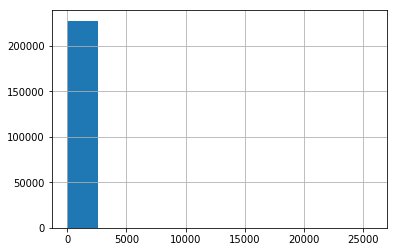

In [2]:
# normalize Amount
from sklearn.preprocessing import StandardScaler
traindata.Amount.hist()
traindata['normAmount'] = StandardScaler().fit_transform(traindata.Amount.values.reshape((-1,1)))

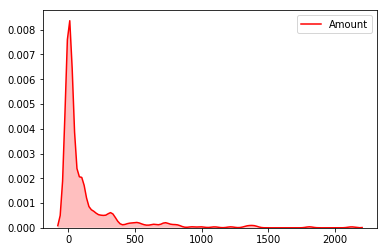

In [3]:
import seaborn as sns
traindata.head()
sns.kdeplot(traindata.Amount[traindata.Class == 1],shade=True,color="red")

In [4]:
# target = traindata.iloc[:,-1]
target = np.ravel(traindata.Class)
features = traindata.iloc[:, 2:-2]
traindata = traindata.drop(['Id', 'Amount', 'Time'], axis =1)
X = traindata.drop(['Class'], axis =1)
y = traindata.Class

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = (1 - testdata.shape[0]/X.shape[0]), random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = testdata.shape[0]/X.shape[0], random_state = 42)
sample_n = testdata.shape[0]
idx = np.array(np.random.choice(X.shape[0], size=sample_n, replace=False))
X_train = X.iloc[idx,:]
y_train = y[idx]

test_idx = np.array(np.random.choice(X.shape[0], size=sample_n, replace=False))
X_test = X.iloc[test_idx,:]
y_test = y.iloc[test_idx]

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  57018
Number transactions test dataset:  57018
Total number of transactions:  114036


### Try: Logistic regression classifier with Undersampled data
    Due to the imbalance of the data, it is pretty much meaningless of the prediction.
      1) Need to increase recall
      2) Apply a cost function when having FN and FP with different weights for each type of error 

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score
c_range = [0.01, 0.1, 1, 10, 100]
fscore_t = []
for i, c_param in enumerate(c_range):
    print('-------------------------------------------')
    print('C parameter: ', c_param)
    print('-------------------------------------------')
    print('')
    clf = LogisticRegression(C = c_param, penalty = 'l1')
    clf.fit(X_train, y_train.values.ravel())
    lr_ptrainfull = clf.predict(X_train)
    fscore_t.append(f1_score(y_train, lr_ptrainfull))
    print('Logistic Regression Accuracy:{0:.3f}'.format(accuracy_score(y_train, lr_ptrainfull), ''))
    print('Recall Score for Logistic Regression\n')
    print(recall_score(y_train, lr_ptrainfull), '\n')
#     print('Confusion matrix for Logistic Regression\n')
#     print(confusion_matrix(y_train, lr_ptrainfull), '\n')
    print('F1 score for Logistic Regression\n')
    print(f1_score(y_train, lr_ptrainfull), '\n')
print(fscore_t)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.42168674698795183 

F1 score for Logistic Regression

0.5737704918032787 

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.6265060240963856 

F1 score for Logistic Regression

0.7428571428571429 

-------------------------------------------
C parameter:  1
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.6987951807228916 

F1 score for Logistic Regression

0.7945205479452054 

-------------------------------------------
C parameter:  10
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.7108433734939759 

F1 score for Logistic Regression

In [7]:
c_range = [0.01, 0.1, 1, 10, 100]
fscore = []
for i, c_param in enumerate(c_range):
    print('-------------------------------------------')
    print('C parameter: ', c_param)
    print('-------------------------------------------')
    print('')
    clf = LogisticRegression(C = c_param, penalty = 'l1')
    clf.fit(X_train, y_train.values.ravel())
    lr_ptestfull = clf.predict(X_test)
    fscore.append(f1_score(y_test, lr_ptestfull))
    print('Logistic Regression Accuracy:{0:.3f}'.format(accuracy_score(y_test, lr_ptestfull), ''))
    print('Recall Score for Logistic Regression\n')
    print(recall_score(y_test, lr_ptestfull), '\n')
#     print('Confusion matrix for Logistic Regression\n')
#     print(confusion_matrix(y_test, lr_ptestfull), '\n')
    print('F1 score for Logistic Regression\n')
    print(f1_score(y_test, lr_ptestfull), '\n')
print(fscore)
cfs_final = c_range[fscore.index(max(fscore))]
print(cfs_final)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.5094339622641509 

F1 score for Logistic Regression

0.6467065868263473 

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.6415094339622641 

F1 score for Logistic Regression

0.7513812154696131 

-------------------------------------------
C parameter:  1
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.6698113207547169 

F1 score for Logistic Regression

0.7717391304347825 

-------------------------------------------
C parameter:  10
-------------------------------------------

Logistic Regression Accuracy:0.999
Recall Score for Logistic Regression

0.6698113207547169 

F1 score for Logistic Regression


#  Add feature selection

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
print(X.columns)
lr_filter = SelectKBest(f_regression, k = 8)
final_clffull = LogisticRegression(C=cfs_final, penalty = 'l1')
lr_svm = Pipeline([('anova', lr_filter), ('svc', final_clffull)])
lr_svm.set_params(anova__k=24, svc__C=cfs_final).fit(X_train, y_train.values.ravel())

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount'],
      dtype='object')


Pipeline(memory=None,
     steps=[('anova', SelectKBest(k=24, score_func=<function f_regression at 0x000002CB339C0488>)), ('svc', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [ ]:
final_clffull = LogisticRegression(C=10, penalty = 'l1')
final_clffull.fit(X_train, y_train.values.ravel())
lr_ptestfull = final_clffull.predict(X_test)
print('Logistic Regression Accuracy:{0:.3f}'.format(accuracy_score(y_test, lr_ptestfull), ''))
print('Classification report for Logistic Regression\n')
print(classification_report(y_test, lr_ptestfull), '\n')
print('Confusion matrix for Logistic Regression\n')
print(confusion_matrix(y_test, lr_ptestfull), '\n')

In [9]:
ksel = lr_svm.named_steps['anova'].get_support()
features = pd.DataFrame(list(zip(X.columns, ksel)))
features = features[0][features[1] == True]

In [10]:
reduced_test = testdata.drop(['Id', 'Amount', 'Time'], axis = 1)
reduced_test['normAmount'] = StandardScaler().fit_transform(testdata.Amount.values.reshape((-1,1)))
# pred = final_clffull.predict(reduced_test[features])
pred = lr_svm.predict(reduced_test)
print(reduced_test.shape[0])
print(sum(pred[pred==1]))
solution = pd.DataFrame({'Id': testdata.Id, 'Class': pred})

57018
80


In [11]:
olddata = pd.read_csv('rw_submission_76tree.csv')
diff = 0

for i in range(len(olddata)):
    if solution.Class.values[i] != olddata.Class.values[i]:
        diff += 1
print(diff)

31


In [ ]:
solution.to_csv('rw_submission_lrROS.csv', index = False, columns = ['Id', 'Class'])

In [ ]:
X_train.shape

#### Decision Tree Method

In [13]:
from sklearn import tree
ctreefull = tree.DecisionTreeClassifier(criterion='gini', max_depth = 10, max_leaf_nodes= X_train.shape[1]//2)
ctreefull.fit(X_train[features], y_train.values.ravel())
tree_ptestfull = ctreefull.predict(X_test[features])
print('Decision Tree Classification Accuracy:{0:.3f}'.format(accuracy_score(y_test, tree_ptestfull),'\n'))
print('Recall Score for Decision Tree Classification\n')
print(recall_score(y_test, tree_ptestfull), '\n')
print('F1 Score for Decision Tree Classification\n')
print(f1_score(y_test, tree_ptestfull), '\n')
print('Cross_val F1 score for Decision Tree Classification\n')
print(cross_val_score(ctreefull, X, y, cv = 5, scoring = 'f1'))

Decision Tree Classification Accuracy:0.999
Recall Score for Decision Tree Classification

0.7358490566037735 

F1 Score for Decision Tree Classification

0.8210526315789474 

Cross_val F1 score for Decision Tree Classification

[0.72727273 0.86896552 0.75342466 0.85106383 0.78571429]


In [14]:
tree_predfinal = ctreefull.predict(reduced_test[features])
print(reduced_test.shape[0])
print(sum(tree_predfinal[tree_predfinal==1]))
solution = pd.DataFrame({'Id': testdata.Id, 'Class': tree_predfinal})

57018
74


In [16]:
diff = 0

for i in range(len(olddata)):
    if solution.Class.values[i] != olddata.Class.values[i]:
        diff += 1
print(diff)
solution.to_csv('rw_submission_trROS.csv', index = False, columns = ['Id', 'Class'])

27
